# 05. 가변수 실습

김보람  
2023-04-25

> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 가변수

In [1]:
library(ggplot2)

## Example

In [34]:
dt <- data.frame(
  y = c(17,26,21,30,22,1,12,19,4,16,
        28,15,11,38,31,21,20,13,30,14),
  x1 = c(151,92,175,31,104,277,210,120,290,238,
         164,272,295,68,85,224,166,305,124,246),
  x2 = rep(c('M','F'), each=10)
)


In [3]:
head(dt)

### 모든 데이터 퉁으로

In [4]:
model_1 <- lm(y~x1, dt)
summary(model_1)

-   모형은 유의하다.

-   MSE=5.124

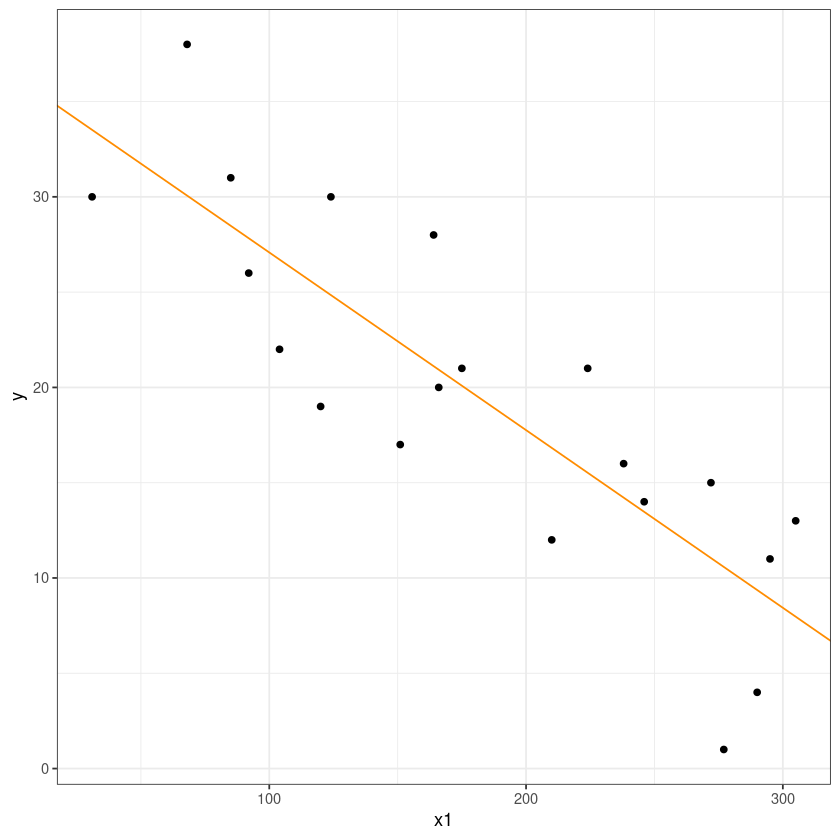

In [5]:
ggplot(dt, aes(x1, y)) + 
  geom_point() + 
  geom_abline(slope = coef(model_1)[2], 
              intercept = coef(model_1)[1], col= 'darkorange')+
  theme_bw()

-   M,F상관없이 모든 데이터 퉁으로!!

-   $\widehat y = 36.40361-0.09323 x_1$

-   시험성적 1점 올라갈때마다 시간이 0.0932 감소한다.

### 성별 M,F

-   model_2 : $y=\beta_0+\beta_1x_1+\beta_2x_2+\epsilon$

-   $x_2=0 \ if F, x_2=1 \ if M$

-   $E(y|F) : \beta_0 + \beta_1x_1$ 여자가 기준

-   $E(y|M) : \beta_0+\beta_1x_1 + \beta_2 = (\beta_0+\beta_2)+\beta_1x_1$

-   $\beta_2 = E(y|M)-E(y|F) = \beta_0 + \beta_2 + \beta_1x_1 - {\beta_0+\beta_1x_1}$

-   즉, $\beta_2$는 시험성적이 동일할 때 여자와 남자의 소요시간의 평균의
    차이

In [6]:
contrasts(factor(dt$x2))

-   $x_2$를 factor로 인식했을 때 무엇이 0이고 무엇이 1인지 알려준다.

-   $H_0: \beta_1=\beta_2=0$

In [7]:
################################
# x2 = factor(rep(c('M','F'), each=10)) 로 입력한 경우 
#y = b0 + b1x1 + b2x2 
# x2 = 0,  F
# x2 = 1,  M
#E(y|M) : b0 + b1x1 + b2 = (b0 + b2) + b1x1
#E(y|F) : b0 + b1x1

# x2 = factor(rep(c(0,1), each=10))로 입력한 경우 
# y = b0 + b1x1 + b2x2 
# x2 = 0,  M
# x2 = 1,  F
#E(y|M) : b0 + b1x1
#E(y|F) : b0 + b1x1+ b2 = = (b0 + b2) + b1x1


model_2 <- lm(y~x1+x2, dt)
summary(model_2)

-   p-value가 유의하다.

-   model1보다 $R^2$값이 많이 올랐다.

-   model1보다 MSE보다 감소했다.

-   `x2M`: x2가 남자 그룹에 있는 계수, F=0이고 M=1이라는 것을 알려준다.

-   $\beta_2=-7.933953$ 값이 나오는데 강의록에는 F=1,M=0이여서
    강의록과는 부호가 바뀐것.

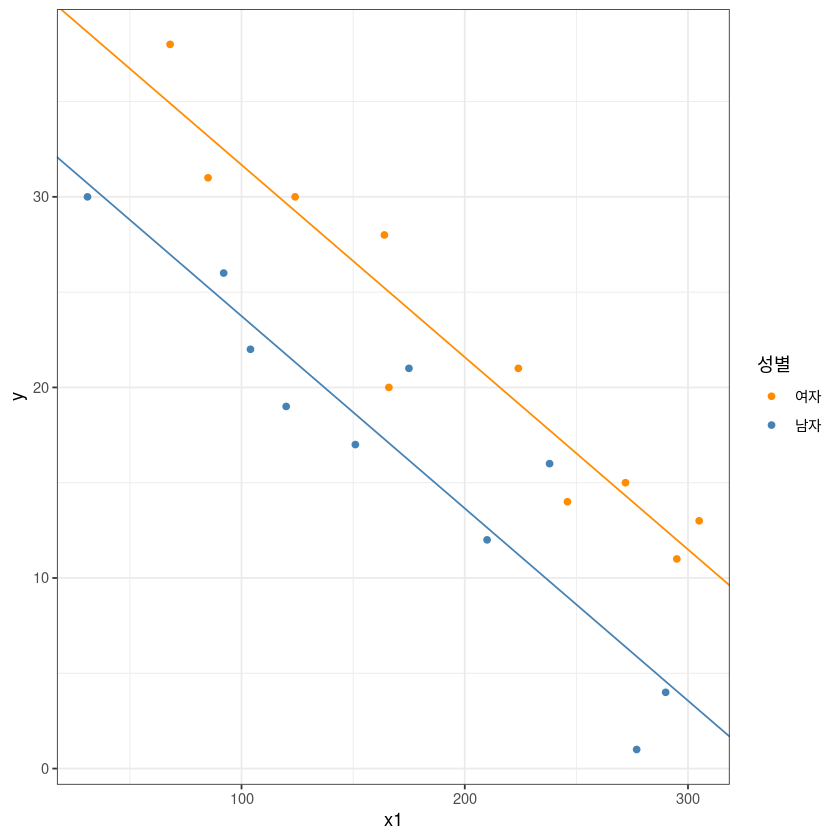

In [8]:
ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(model_2)[2], 
              intercept = coef(model_2)[1], col= 'darkorange')+
  geom_abline(slope = coef(model_2)[2], 
              intercept = coef(model_2)[1]+coef(model_2)[3], col= 'steelblue')+
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("여자", "남자"), values = c("darkorange", "steelblue"))


-   $H_0:\beta_2=0 \ vs. \ H_1:\beta_2 \neq 0$

In [9]:
summary(model_2)$coefficients

-   개별회귀계수에 대한 유의성검정 , 유의확률 값이 작으므로
    $\beta_2=0$이라고 할 수 있다.

-   `Pr(>|t|)`은 양측검정에 대한 유의확률 값이다.

-   $H_0:\beta_2=0 \ vs. \ H_1:\beta_2 < 0$

-   이 때의 유의확률? -\> 위의 표와 t-value는 똑같다. `-5.608213`

-   $t=\dfrac{\widehat \beta_2}{\widehat{s.e}(\widehat \beta_2)}$

-   `H_1:\beta_2 < 0` 단측 검정에 대한 유의확률 값은 `Pr(>|t|)/2`

-   t-value의 `-5.608213` 값을 제곱하면 아래 표의 F값 `31.45206` 이
    나온다. `Pr(>F)`값은 똑같음

In [10]:
-5.608213^2

-   자유도가 1개일때 t-value와 F검정의 값은 동일하다

In [11]:
anova(model_1, model_2)

-   RM: model_1

-   FM: model_2

-   `472.5913` : $SSE_{RM}$

-   `165.8145` : $SSE_{FM}$

### 교호작용

$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_1x_2+\epsilon$

$x_2 = 0 if F, x_2 = 1 if M$

$E(y|F): \beta_0 + \beta_1 x_1$

$E(y|M): \beta_0 + \beta_1x_1 + \beta_2 + \beta_3 x_1 = (\beta_0+\beta_2) + (\beta_1+\beta_3)x_1$

In [12]:
model_3 <- lm(y~x1*x2, dt) #교호작용 보고 싶을 떈 x1*x2 곱하기
# 혹은 lm(y~x1+x2+x1:x2,dt)
summary(model_3)


-   모형 자첸는 유의하고,

-   model2에 비하면 $R^2$가 더 감소했다.

-   $H_0: \beta_3=0 \ vs. \ H_1:\beta_3 \neq 0$에서 $H_0$기각 못함

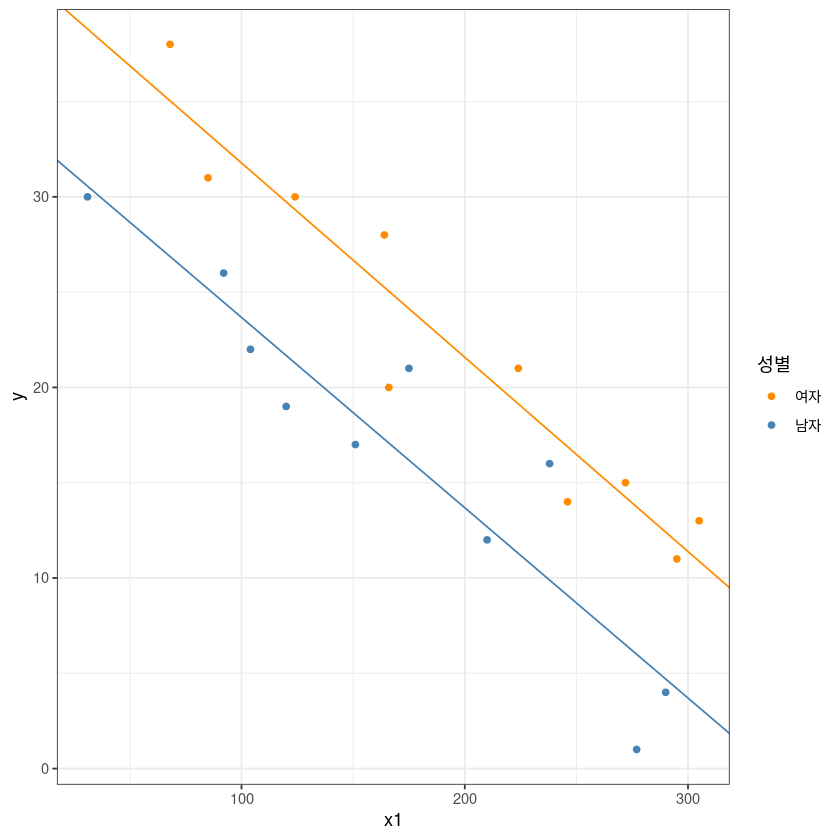

In [13]:
## y = b0 + b1x1 + b2x2 + b3x1x2
## M : x2=0 => E(y|M) = b0+b1x1
## F : x2=1 => E(y|F) = b0 + b1x1 + b2 + b3x1 
##                    = (b0+b2) + (b1+b3)x1

ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(model_3)[2], 
              intercept = coef(model_3)[1], col= 'darkorange')+
  geom_abline(slope = coef(model_3)[2]+coef(model_3)[4], 
              intercept = coef(model_3)[1]+coef(model_3)[3], col= 'steelblue')+
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("여자", "남자"), values = c("darkorange", "steelblue"))

-   $H_0: \beta_3=0 \ vs. \ H_1:\beta_3 \neq 0$

In [14]:
summary(model_3)$coefficients

In [15]:
anova(model_2, model_3)

$H_0: \beta_2=\beta_3=0 \ vs. \ H_1: not H_0$ 에서

RM: model_1 (x1), FM: model_3 (x1\*x2) 아래표 보자

In [16]:
anova(model_1, model_3)

`472.5913`=SSE_RM

`165.6713`=SSE_FM

`2`=3-1

### 가변수가 아닌 one-hot encodeing

In [17]:
dt2 <- data.frame(y=dt$y,
                  x1=dt$x1,
                  x2=as.numeric(dt$x2=='M'),
                  x3=as.numeric(dt$x2=='F'))
head(dt2)
                                    

In [18]:
model_4 <-lm(y~., dt2)
summary(model_4)

-   $y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\epsilon$

-   full Rank가 아니여서 구할 수 없다..

-   1 = x2(M)+x3(F) 가 되서 full rank가 안되는데 이중 하나를 날리면
    된다.

-   아래 model_5는 절편이 없는 모델을 만들어서 돌려보자

In [19]:
model_5 <- lm(y~0+x1+x2+x3,dt2)
summary(model_5)

-   modle5 : $y=\beta_1x_1+\beta_2x_2 + \beta_3x_3 + \epsilon$

-   $x_2 = 1 if M, x_2=0 if F$

-   $x_3 = 0 if M, x_3=1 if F$

-   $E(y|M) = \beta_1x_1 + \beta_2$ - (\*)

-   $E(y|F) = \beta_1 + \beta_3$

-   기울기는 동일한데, 절편이 다르다. 잎에서 쓴 모형과 비교해 본다면,

-   $E(y|M) = (\beta_0 + \beta_2) + \beta_1x_1$에서 (\*)의
    $\beta_2 = \beta_0+\beta_2$

## Carseats 예시

In [20]:
install.packages("ISLR")

Installing package into ‘/home/coco/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)


In [21]:
library(ISLR)

In [22]:
head(Carseats)
dim(Carseats)

• Sales : 판매량 (단위: 1,000)

• Price : 각 지점에서의 카시트 가격

• ShelveLoc : 진열대의 등급 (Bad, Medium, Good)

• Urban :도시 여부 (Yes, No)

• US: 미국 여부 (Yes, No)

-   판매량을 예측하자.

-   $y=\beta_0 + \beta_1x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon$

-   $x_1$:Price, $x_2,x_3$는 가변수

-   $x_2 = 1$, if ShelveLoc = Good, $x_2=0$, if o.w.

-   $x_3 = 1$, if ShelveLoc = Medium, $x_3=0$, if o.w.

-   $E(y|Bad) = \beta_0+\beta_1x_1$ \<- base

-   $E(y|Med) = \beta_0 + \beta_1x_1+ \beta_3 = (\beta_0+\beta_3)+\beta_1x_1$

-   $E(y|Good) = \beta_0 + \beta_1x_1 + \beta_2 = (\beta_0+\beta_2) + \beta_1x_1$

In [23]:
fit <- lm(fit<-lm(Sales~Price+ShelveLoc, 
                  data=Carseats))
summary(fit)  

-   교호작용은 보지 않겠따.

In [24]:
contrasts(Carseats$ShelveLoc)

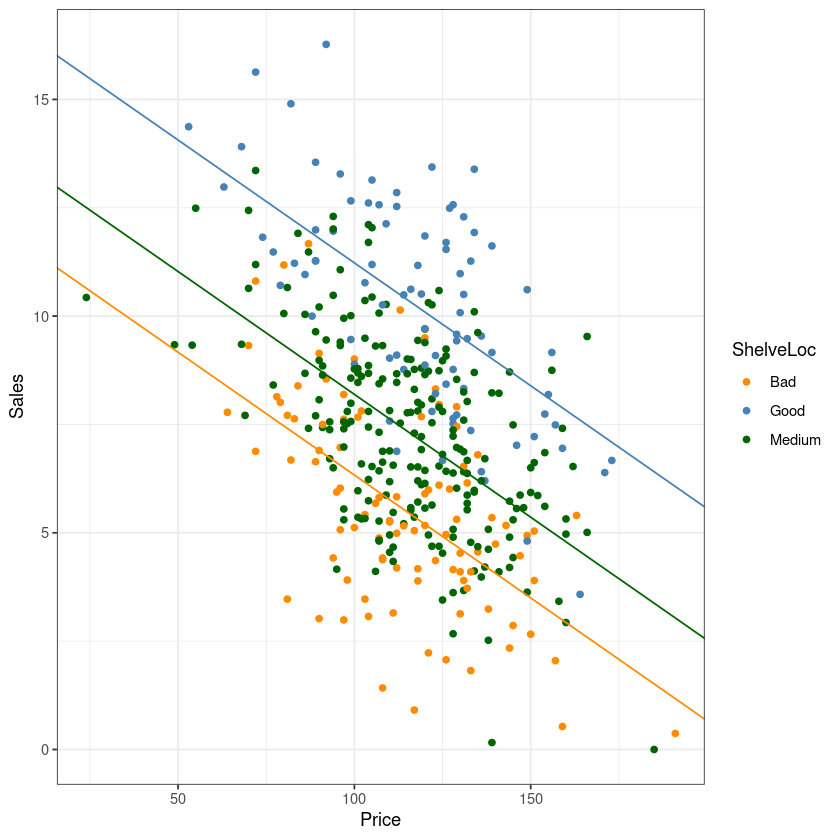

In [25]:
ggplot(Carseats, aes(Price, Sales, col=ShelveLoc)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1], col= 'darkorange')+
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1]+coef(fit)[3], col= 'steelblue')+
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1]+coef(fit)[4], col= 'darkgreen')+
  guides(col=guide_legend(title="ShelveLoc")) +
  scale_color_manual(labels = c("Bad", "Good", "Medium"), 
                     values = c("darkorange", "steelblue","darkgreen"))


-   $y=\beta_0 + \beta_1x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 \epsilon$

-   $x_2 = 1$, if ShelveLoc = Good, $x_2=0$, if o.w.

-   $x_3 = 1$, if ShelveLoc = Medium, $x_3=0$, if o.w.

-   $x_4 = 1$, if US=yes, $x_4=0$, if US=no

In [26]:
contrasts(Carseats$US)

In [27]:
fit1 <- lm(fit<-lm(Sales~Price+ShelveLoc+US, 
                  data=Carseats))
summary(fit1)  

## 구간별 회귀분석

In [28]:
dt <- data.frame(
  y = c(377,249,355,475,139,452,440,257),
  x1 = c(480,720,570,300,800,400,340,650)
)

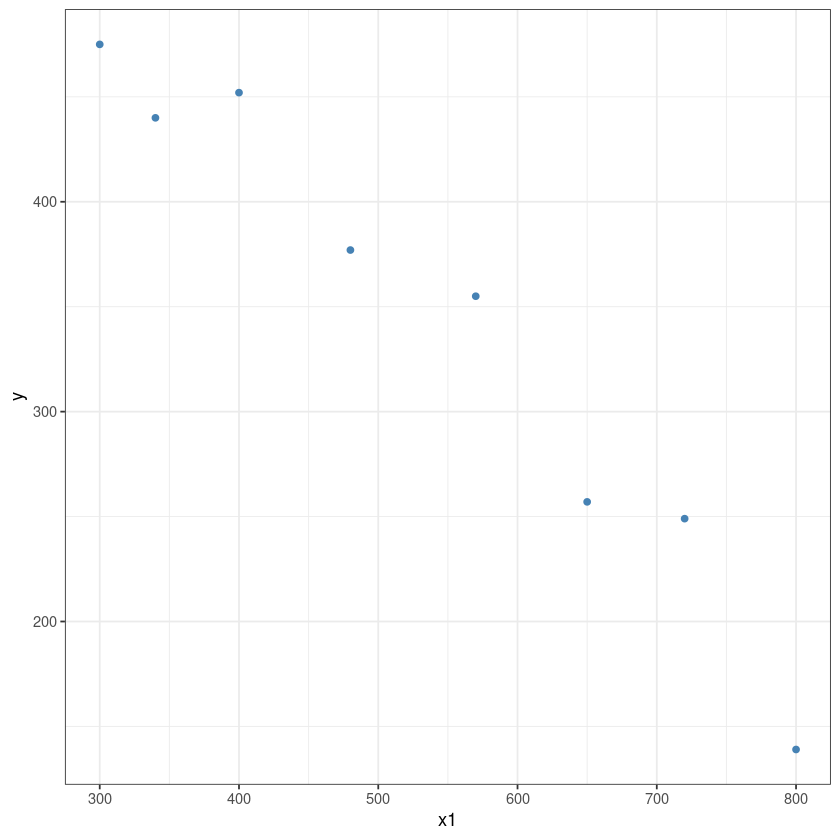

In [29]:
ggplot(data = dt, aes(x = x1, y = y)) + 
  geom_point(color='steelblue') + 
  theme_bw()

In [30]:


### threshould = 500
## x2(x1-xw)=x2(x1-500) = (x1 - 500)+ := x2

dt$x2 = sapply(dt$x1, function(x) max(0, x-500))


In [31]:
m <- lm(y ~ x1+x2, dt)
summary(m)


In [32]:

dt2 <- rbind(dt[,2:3], c(500,0))
dt2$y <- predict(m, newdata = dt2)

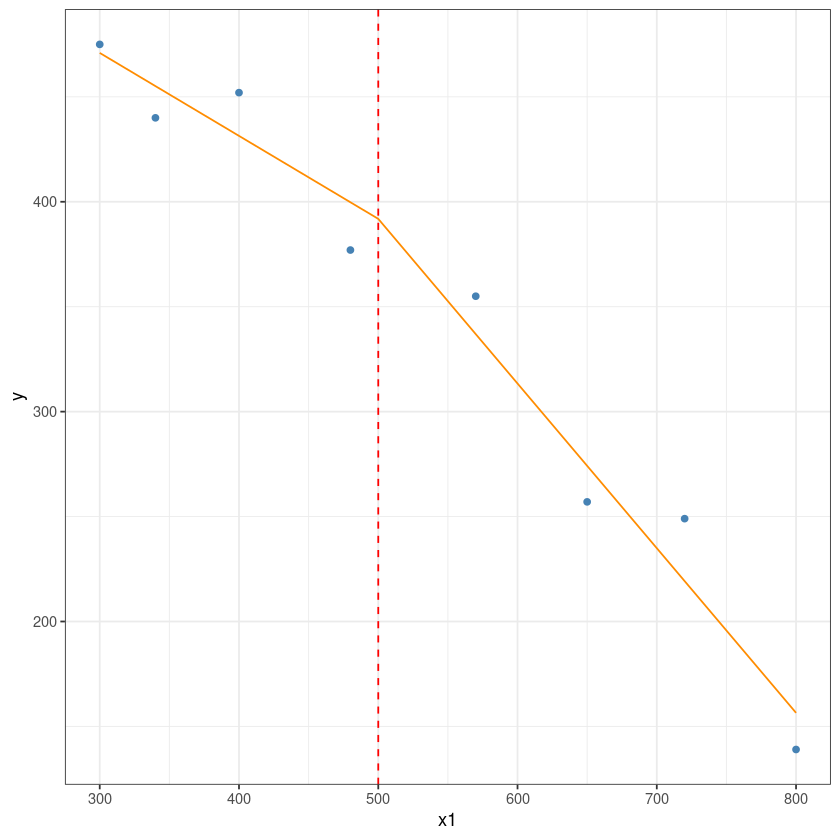

In [33]:
# this is the predicted line of multiple linear regression
ggplot(data = dt, aes(x = x1, y = y)) + 
  geom_point(color='steelblue') +
  geom_line(color='darkorange',
            data = dt2, aes(x=x1, y=y))+
  geom_vline(xintercept = 500, lty=2, col='red')+
  theme_bw()